##Importing libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
import time
import datetime
import warnings
import re
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [49]:
df = pd.read_csv('Tesla Deaths.csv')
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,-,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla-kracht-gegen-baum-und-brennt-aus-zwei-tote-und-drei-schwerverletzte-2584180,NaN,NaN,NaN,NaN,NaN
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,-,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-kills-4-tesla-big-rig/40898893?utm_campaign=snd-autopilot,NaN,NaN,NaN,NaN,NaN
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,1,1,NaN,-,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,1,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-fatally-struck-by-suv-tesla-in-pasco-county/,NaN,NaN,NaN,NaN,NaN
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1,-,-,-,1,-,-,-,https://www.boothbayregister.com/article/southport-accident-victim-named/163623,NaN,James T. Penner,NaN,NaN,NaN


In [50]:
df.shape

(254, 21)

In [51]:
df.isnull().sum()

Case #                                0
Year                                  0
Date                                  0
 Country                              0
 State                               69
 Description                          0
 Deaths                               0
 Tesla driver                         4
 Tesla occupant                       8
 Other vehicle                        3
 Cyclists/ Peds                       2
 TSLA+cycl / peds                     1
 Model                                3
 AutoPilot claimed                    4
 Verified Tesla Autopilot Death       0
 Source                               0
 Note                               246
 Deceased 1                         183
 Deceased 2                         239
 Deceased 3                         250
 Deceased 4                         254
dtype: int64

In [52]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [53]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'AutoPilotclaimed',
       'VerifiedTeslaAutopilotDeath', 'Source', 'Note', 'Deceased1',
       'Deceased2', 'Deceased3', 'Deceased4'],
      dtype='object')

In [54]:
df.drop(columns=["Deceased4"],inplace=True)
df.drop(columns=["Deceased3"],inplace=True)
df.drop(columns=["Deceased2"],inplace=True)
df.drop(columns=["Deceased1"],inplace=True)
df.drop(columns=["Note"],inplace=True)
df.drop(columns=["Source"],inplace=True)

In [55]:
df.corr()

,Case#,Year,Deaths
Case#,1.000000,0.934937,0.128079
Year,0.934937,1.000000,0.097627
Deaths,0.128079,0.097627,1.000000


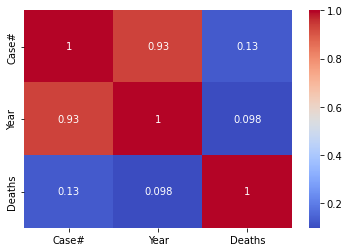

In [56]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

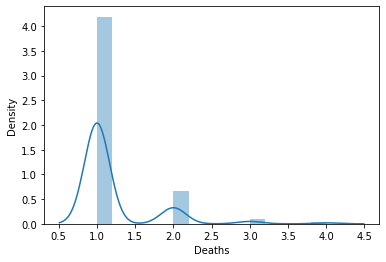

In [57]:
sns.distplot(df['Deaths'])

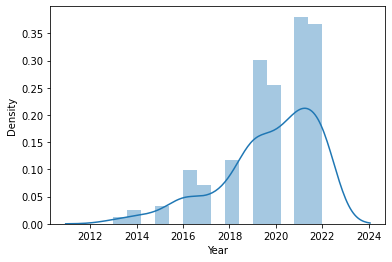

In [58]:
sns.distplot(df['Year'])

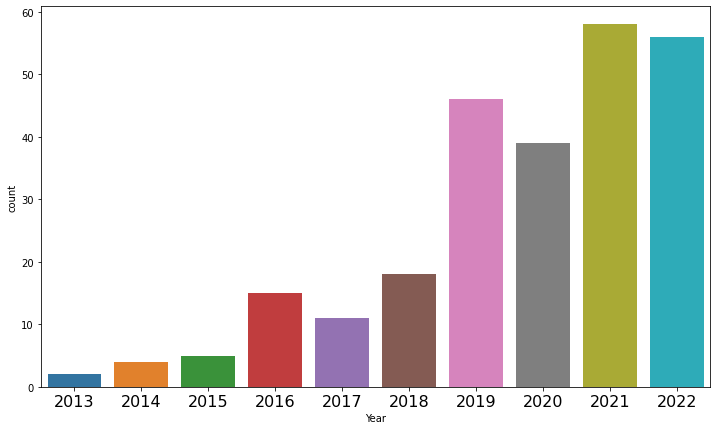

In [59]:
plt.figure(figsize=(12,7))
sns.countplot(df['Year'])
plt.xticks(fontsize=16)
plt.show()

In [60]:
import plotly.express as px
c_df = df.groupby(['Country'])['Deaths'].sum().reset_index()
c_fig = px.bar(c_df, x='Country', y='Deaths', title='Country wise deaths reported of Tesla Cars', text='Deaths')
c_fig.show()

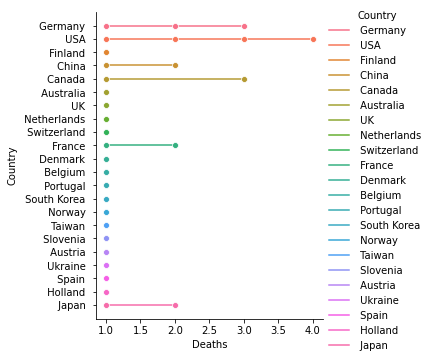

In [61]:
sns.relplot(x='Deaths', y='Country',kind = 'line', data=df, hue='Country', marker='o', ci = None)
plt.show()

In [62]:
df['State'] = df['State'].fillna(df['Country'])

In [63]:
df.isnull().sum()

Case#                          0
Year                           0
Date                           0
Country                        0
State                          0
Description                    0
Deaths                         0
Tesladriver                    4
Teslaoccupant                  8
Othervehicle                   3
Cyclists/Peds                  2
TSLA+cycl/peds                 1
Model                          3
AutoPilotclaimed               4
VerifiedTeslaAutopilotDeath    0
dtype: int64

##Checking correlation for categorical columns using chi-square test

###In this statistical test if the p-values is less than 0.05 then it is said to be the columns are correlated with each other

In [64]:
# Create a contingency table for column Country
contingency_table = pd.crosstab(df.Country,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  0.9999988621309681
chi-square 23.30847083884366


In [65]:
# Create a contingency table for column Tesladriver
contingency_table = pd.crosstab(df.Tesladriver,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  0.06752062114137268
chi-square 7.141541333860343


In [66]:
# Create a contingency table for column Teslaoccupant
contingency_table = pd.crosstab(df.Teslaoccupant,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  9.381779824133923e-46
chi-square 235.90449485997874


In [67]:
# Create a contingency table for column Othervehicle
contingency_table = pd.crosstab(df.Othervehicle,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  7.622450259460481e-64
chi-square 332.2828399381143


In [68]:
# Create a contingency table for column Model
contingency_table = pd.crosstab(df.Model,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  0.8457199926232009
chi-square 7.176683543247678


In [69]:
# Create a contingency table for column AutoPilotclaimed
contingency_table = pd.crosstab(df.AutoPilotclaimed,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  0.002944072366353985
chi-square 19.85064809416589


In [70]:
# Create a contingency table for column VerifiedTeslaAutopilotDeath
contingency_table = pd.crosstab(df.VerifiedTeslaAutopilotDeath,df.Deaths)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value: ",p)
print("chi-square",chi2)

p-value:  0.1720593263109975
chi-square 9.02710692258124


In [71]:
df.describe()

,Case#,Year,Deaths
count,254.00000,254.000000,254.000000
mean,127.50000,2019.732283,1.196850
std,73.46768,2.073544,0.495663
min,1.00000,2013.000000,1.000000
25%,64.25000,2019.000000,1.000000
50%,127.50000,2020.000000,1.000000
75%,190.75000,2021.000000,1.000000
max,254.00000,2022.000000,4.000000


In [72]:
col_list = list(df.columns)
col_list

['Case#',
 'Year',
 'Date',
 'Country',
 'State',
 'Description',
 'Deaths',
 'Tesladriver',
 'Teslaoccupant',
 'Othervehicle',
 'Cyclists/Peds',
 'TSLA+cycl/peds',
 'Model',
 'AutoPilotclaimed',
 'VerifiedTeslaAutopilotDeath']

In [73]:
# fit --> feeding the data, transform --> converting the data into numeric data type
'''col_list = list(df)
encoded_df = df
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in col_list:
    encoded_df[i]=label_encoder.fit_transform(df[i])'''

'col_list = list(df)\nencoded_df = df\nfrom sklearn.preprocessing import LabelEncoder\nlabel_encoder=LabelEncoder()\nfor i in col_list:\n    encoded_df[i]=label_encoder.fit_transform(df[i])'

In [74]:
encoded_df = pd.get_dummies(df,drop_first=bool)

In [75]:
encoded_df.head()

,Case#,Year,Deaths,Date_1/10/2021,Date_1/15/2021,Date_1/16/2022,Date_1/17/2017,Date_1/18/2020,Date_1/19/2020,Date_1/20/2016,Date_1/21/2020,Date_1/21/2021,Date_1/22/2015,Date_1/22/2021,Date_1/26/2020,Date_1/30/2019,Date_1/31/2020,Date_1/4/2020,Date_1/5/2020,Date_10/10/2016,Date_10/10/2020,Date_10/12/2019,Date_10/15/2021,Date_10/17/2019,Date_10/19/2019,Date_10/26/2018,Date_10/28/2021,Date_10/31/2020,Date_10/7/2016,Date_10/7/2020,Date_11/1/2019,Date_11/10/2018,Date_11/10/2019,Date_11/14/2017,Date_11/14/2019,Date_11/15/2018,Date_11/15/2021,Date_11/16/2020,Date_11/18/2015,Date_11/2/2013,Date_11/20/2019,Date_11/21/2019,Date_11/22/2017,Date_11/22/2019,Date_11/23/2016,Date_11/24/2019,Date_11/29/2021,Date_11/3/2016,Date_11/4/2021,Date_11/6/2021,Date_11/7/2019,Date_11/8/2021,Date_11/9/2018,Date_12/1/2019,Date_12/1/2021,Date_12/10/2019,Date_12/10/2020,Date_12/11/2019,Date_12/11/2020,Date_12/11/2021,Date_12/18/2020,Date_12/18/2021,Date_12/19/2019,Date_12/2/2021,Date_12/20/2016,Date_12/22/2015,Date_12/23/2019,Date_12/24/2021,Date_12/26/2018,Date_12/28/2015,Date_12/28/2021,Date_12/29/2019,Date_12/30/2014,Date_12/30/2018,Date_12/31/2021,Date_12/4/2020,Date_12/7/2021,Date_2/12/2022,Date_2/18/2019,Date_2/22/2021,Date_2/24/2019,Date_2/24/2020,Date_2/27/2022,Date_2/28/2022,Date_2/7/2022,Date_3/1/2019,Date_3/10/2019,Date_3/10/2021,Date_3/12/2018,Date_3/12/2022,Date_3/13/2017,Date_3/13/2021,Date_3/13/2022,Date_3/14/2022,Date_3/18/2019,Date_3/20/2021,Date_3/20/2022,Date_3/21/2021,Date_3/21/2022,Date_3/23/2018,Date_3/26/2022,Date_3/4/2020,Date_3/5/2022,Date_3/7/2021,Date_3/7/2022,Date_3/8/2020,Date_4/1/2020,Date_4/1/2021,Date_4/10/2022,Date_4/13/2021,Date_4/14/2021,Date_4/15/2019,Date_4/16/2021,Date_4/17/2021,Date_4/2/2013,Date_4/22/2016,Date_4/24/2020,Date_4/25/2019,Date_4/26/2017,Date_4/28/2018,Date_4/29/2018,Date_4/29/2022,Date_4/3/2020,Date_4/3/2021,Date_4/30/2019,Date_4/8/2016,Date_4/8/2022,Date_5/1/2022,Date_5/10/2018,Date_5/11/2017,Date_5/11/2022,Date_5/12/2022,Date_5/14/2020,Date_5/15/2021,Date_5/16/2022,Date_5/18/2022,Date_5/19/2022,Date_5/20/2018,Date_5/21/2022,Date_5/23/2022,Date_5/25/2020,Date_5/25/2022,Date_5/26/2021,Date_5/28/2022,Date_5/31/2019,Date_5/4/2020,Date_5/5/2020,Date_5/5/2021,Date_5/7/2016,Date_5/7/2021,Date_5/7/2022,Date_5/8/2018,Date_6/1/2021,Date_6/10/2017,Date_6/11/2021,Date_6/13/2022,Date_6/14/2022,Date_6/16/2021,Date_6/17/2020,Date_6/17/2022,Date_6/19/2021,Date_6/20/2022,Date_6/21/2020,Date_6/22/2015,Date_6/23/2020,Date_6/25/2017,Date_6/26/2022,Date_6/29/2021,Date_6/3/2022,Date_6/30/2019,Date_6/4/2019,Date_6/7/2019,Date_6/7/2022,Date_6/8/2016,Date_6/8/2020,Date_7/12/2022,Date_7/13/2019,Date_7/14/2014,Date_7/16/2022,Date_7/18/2020,Date_7/21/2017,Date_7/21/2019,Date_7/21/2021,Date_7/22/2016,Date_7/23/2021,Date_7/24/2018,Date_7/24/2022,Date_7/26/2021,Date_7/27/2022,Date_7/29/2016,Date_7/4/2014,Date_7/5/2022,Date_7/6/2022,Date_7/7/2021,Date_7/7/2022,Date_7/8/2019,Date_7/8/2022,Date_8/12/2020,Date_8/13/2017,Date_8/13/2020,Date_8/14/2022,Date_8/15/2016,Date_8/15/2019,Date_8/15/2022,Date_8/16/2022,Date_8/17/2021,Date_8/2/2020,Date_8/2/2022,Date_8/24/2019,Date_8/24/2020,Date_8/25/2021,Date_8/26/2021,Date_8/29/2021,Date_8/4/2018,Date_9/1/2016,Date_9/1/2019,Date_9/11/2019,Date_9/12/2020,Date_9/13/2021,Date_9/15/2018,Date_9/17/2019,Date_9/17/2020,Date_9/17/2021,Date_9/21/2018,Date_9/22/2019,Date_9/24/2017,Date_9/4/2021,Date_9/5/2020,Date_9/6/2020,Date_9/7/2016,Date_9/7/2019,Date_9/8/2019,Country_ Austria,Country_ Belgium,Country_ Canada,Country_ China,Country_ Denmark,Country_ Finland,Country_ France,Country_ Germany,Country_ Holland,Country_ Japan,Country_ Netherlands,Country_ Norway,Country_ Portugal,Country_ Slovenia,Country_ South Korea,Country_ Spain,Country_ Switzerland,Country_ Taiwan,Country_ UK,Country_ USA,Country_ Ukraine,State_ Australia,State_ Austria,State_ Belgium,State_ CA,State_ CO,State_ Canada,State_ China,State_ DE,State_ Denmark,State_ FL,State_ Finland,State_ France,State_ GA,State_ Germany,State_ HI,State_ 

In [76]:
encoded_df.shape

(254, 540)

In [77]:
encoded_df.columns

Index(['Case#', 'Year', 'Deaths', 'Date_1/10/2021', 'Date_1/15/2021',
       'Date_1/16/2022', 'Date_1/17/2017', 'Date_1/18/2020', 'Date_1/19/2020',
       'Date_1/20/2016',
       ...
       'TSLA+cycl/peds_3', 'TSLA+cycl/peds_4', 'Model_ S ', 'Model_ X ',
       'Model_ Y ', 'Model_3', 'AutoPilotclaimed_1', 'AutoPilotclaimed_2',
       'VerifiedTeslaAutopilotDeath_1', 'VerifiedTeslaAutopilotDeath_2'],
      dtype='object', length=540)

In [81]:
target = encoded_df['Deaths']
encoded_df.drop(columns='Deaths',inplace=True)

In [82]:
X = encoded_df
y = target

In [83]:
X.shape

(254, 539)

In [84]:
y.shape

(254,)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=69)

##Apply Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [87]:
l_pred = l_reg.predict(X_test)

In [88]:
from sklearn.metrics import *
r2_on_test=r2_score(y_test, l_pred)
r2_on_test

0.4408528476231658

In [90]:
from sklearn.metrics import r2_score
score = r2_score(y_test,l_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 44.0%


##Apply Decision Tree Regression

In [91]:
from sklearn.tree import DecisionTreeRegressor
d_reg = DecisionTreeRegressor(random_state = 0)
d_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [92]:
d_pred = d_reg.predict(X_test)

In [93]:
from sklearn.metrics import *
r2_on_test=r2_score(y_test, d_pred)
r2_on_test

0.23718712753277715

##Apply Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
r_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
r_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [95]:
r_pred = r_reg.predict(X_test)

In [96]:
from sklearn.metrics import *
r2_on_test=r2_score(y_test, r_pred)
r2_on_test

0.33025029797377825

In [98]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, l_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,l_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,l_pred)))

Mean Absolute Error: 0.19576698468922743
Mean Squared Error: 0.1145323390732822
Root Mean Squared Error: 0.33842626829677713
